In [ ]:
from google.colab import files
import pandas as pd

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Read the uploaded CSV file into a DataFrame
for filename in uploaded.keys():
    print(f"File uploaded: {filename}")
    df = pd.read_csv(filename)
    print("First 5 rows of the dataset:")
    print(df.head())

Saving dataset_smishviz_121120241055.csv to dataset_smishviz_121120241055.csv
File uploaded: dataset_smishviz_121120241055.csv
First 5 rows of the dataset:
   messageid                                           Fulltext  \
0       1141  13:40\n+\n8\n+1 (424) 466-2198 >\nText Message...   
1        783  46\n17:53\nO\nCitiAlrt: Your debit has been di...   
2        824  VZW Wi-Fi\n2:12 PM\nalerts@wellsfargo.departme...   
3        919  (646) 250-2340\nWednesday, December 1, 2021 4:...   
4         54  8:16 G / nu f\n< +17203471494\nAdd to contacts...   

                                Sender     SenderType          timeReceived  \
0                    +1 (424) 466-2198   Phone Number  09/15/2023, 20:41:16   
1                    +1 (803) 599-9244   Phone Number  05/16/2023, 04:28:55   
2  alerts@wellsfargo.department600.com  Email To Text  05/20/2023, 00:45:36   
3                       (646) 250-2340   Phone Number  05/25/2023, 19:47:33   
4                          17203471494   Phone

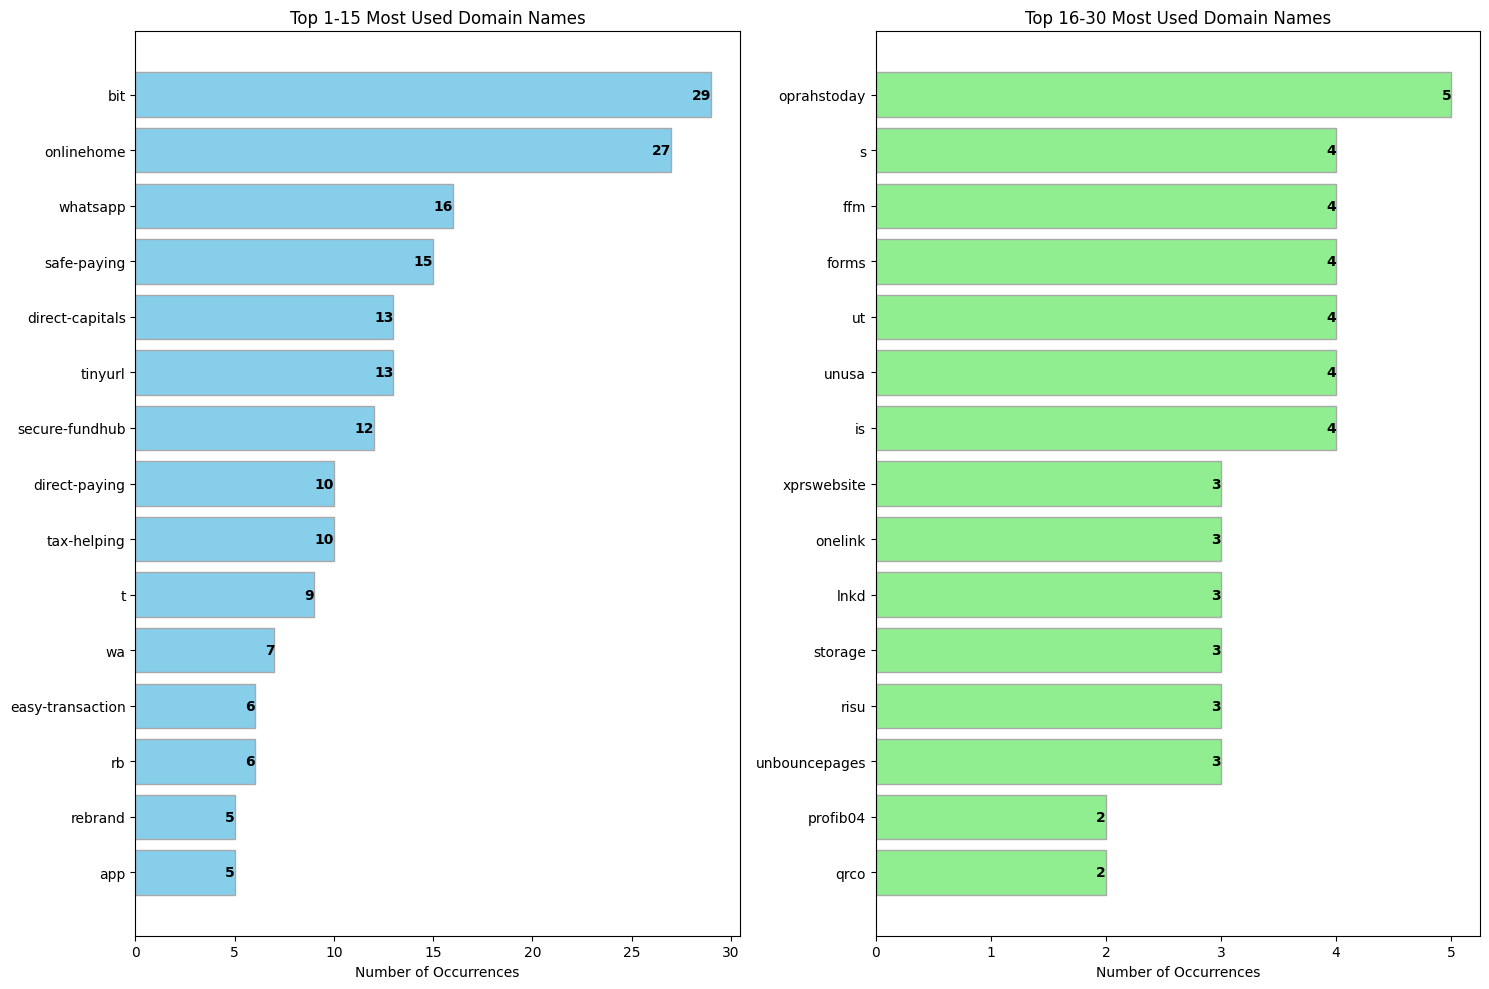

In [ ]:
import matplotlib.pyplot as plt

data = df
domain_counts = data['Domain'].value_counts()
domain_counts = domain_counts.drop('nan', errors='ignore')

# Split data into two parts
top_half = domain_counts.head(15)
bottom_half = domain_counts[15:30]

fig, axes = plt.subplots(1, 2, figsize=(15, 10))  # Create two subplots side by side

# First half of the domains
axes[0].barh(top_half.index, top_half.values, color='skyblue', edgecolor='darkgrey')
axes[0].set_title('Top 1-15 Most Used Domain Names', fontsize=12)
axes[0].invert_yaxis()
axes[0].set_xlabel('Number of Occurrences')
for i, v in enumerate(top_half.values):
    axes[0].text(v, i, str(v), va='center', ha='right', fontweight='bold')

# Second half of the domains
axes[1].barh(bottom_half.index, bottom_half.values, color='lightgreen', edgecolor='darkgrey')
axes[1].set_title('Top 16-30 Most Used Domain Names', fontsize=12)
axes[1].invert_yaxis()
axes[1].set_xlabel('Number of Occurrences')
for i, v in enumerate(bottom_half.values):
    axes[1].text(v, i, str(v), va='center', ha='right', fontweight='bold')

plt.tight_layout()
plt.show()


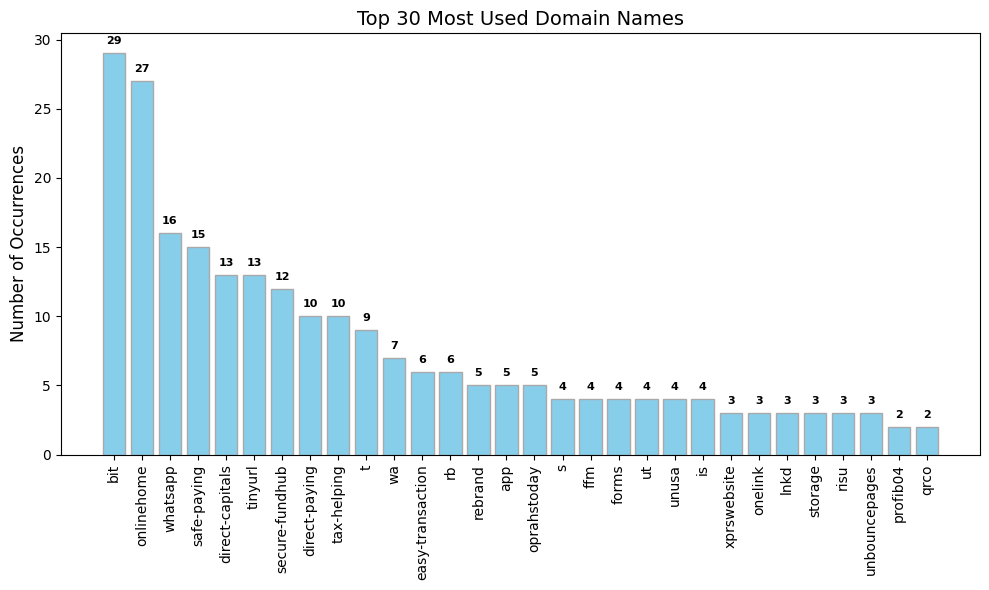

In [ ]:
# Step 2: Count occurrences of each domain
domain_counts = df['Domain'].value_counts()

# Remove nan if present
domain_counts = domain_counts.drop('nan', errors='ignore')

# Select the top 30 most used domain names
top_domains = domain_counts.head(30)

# Step 3: Plot a vertical bar chart
plt.figure(figsize=(10, 6))  # Adjust width and height for two-column format
bars = plt.bar(top_domains.index, top_domains.values, color='skyblue', edgecolor='darkgrey')

# Rotate x-axis labels for readability
plt.xticks(rotation=90, ha='center', fontsize=10)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.title('Top 30 Most Used Domain Names', fontsize=14)

# Step 4: Add number labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{int(height)}',
             ha='center', va='bottom', fontweight='bold', fontsize=8)

# Adjust layout to fit in a two-column format
plt.tight_layout()
plt.show()


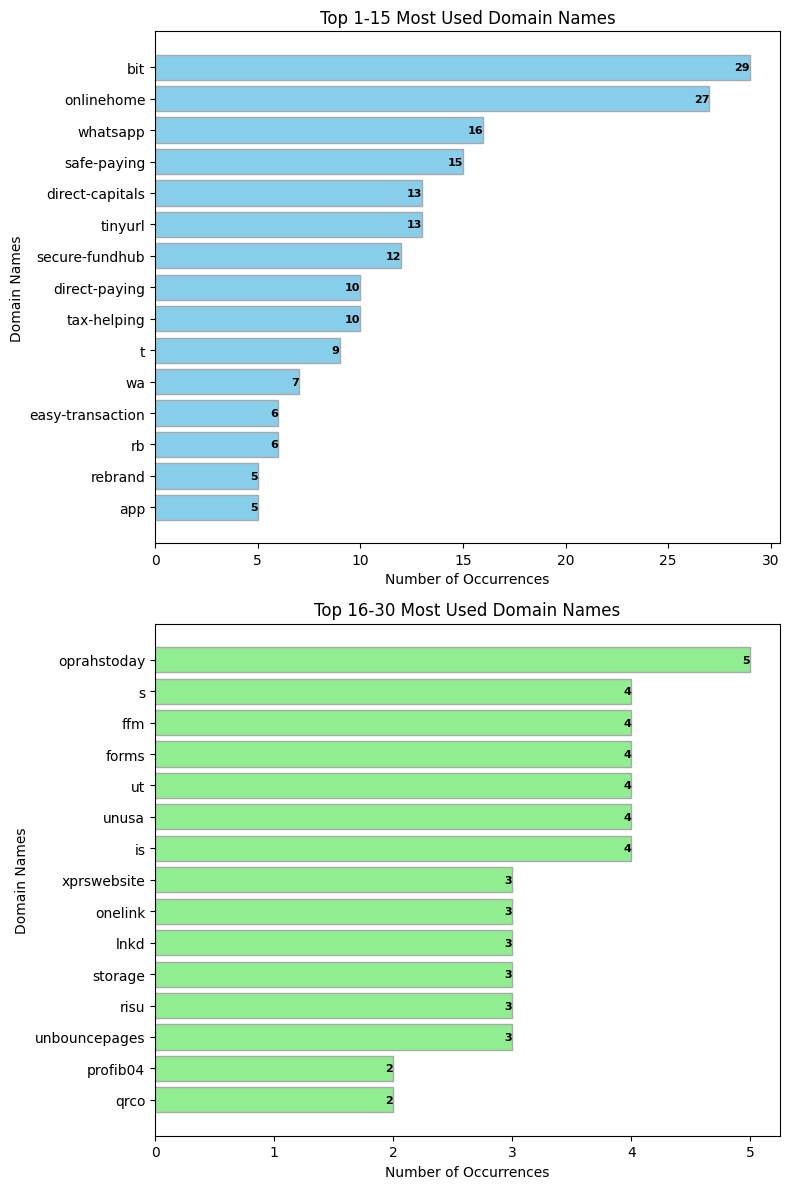

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each domain
domain_counts = data['Domain'].value_counts()
domain_counts = domain_counts.drop('nan', errors='ignore')  # Remove NaN if present

# Split the top 30 into two parts
top_half = domain_counts.head(15)  # First 15 domains
bottom_half = domain_counts[15:30]  # Next 15 domains

fig, axes = plt.subplots(2, 1, figsize=(8, 12))  # 2 rows, 1 column of subplots

# Plot the first half of domains (top 1-15)
bars1 = axes[0].barh(top_half.index, top_half.values, color='skyblue', edgecolor='darkgrey')
axes[0].set_title('Top 1-15 Most Used Domain Names', fontsize=12)
axes[0].invert_yaxis()
axes[0].set_xlabel('Number of Occurrences', fontsize=10)
axes[0].set_ylabel('Domain Names', fontsize=10)
for bar in bars1:
    width = bar.get_width()
    axes[0].text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}',
                 ha='right', va='center', fontweight='bold', fontsize=8)

# Plot the second half of domains (16-30)
bars2 = axes[1].barh(bottom_half.index, bottom_half.values, color='lightgreen', edgecolor='darkgrey')
axes[1].set_title('Top 16-30 Most Used Domain Names', fontsize=12)
axes[1].invert_yaxis()
axes[1].set_xlabel('Number of Occurrences', fontsize=10)
axes[1].set_ylabel('Domain Names', fontsize=10)
for bar in bars2:
    width = bar.get_width()
    axes[1].text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}',
                 ha='right', va='center', fontweight='bold', fontsize=8)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


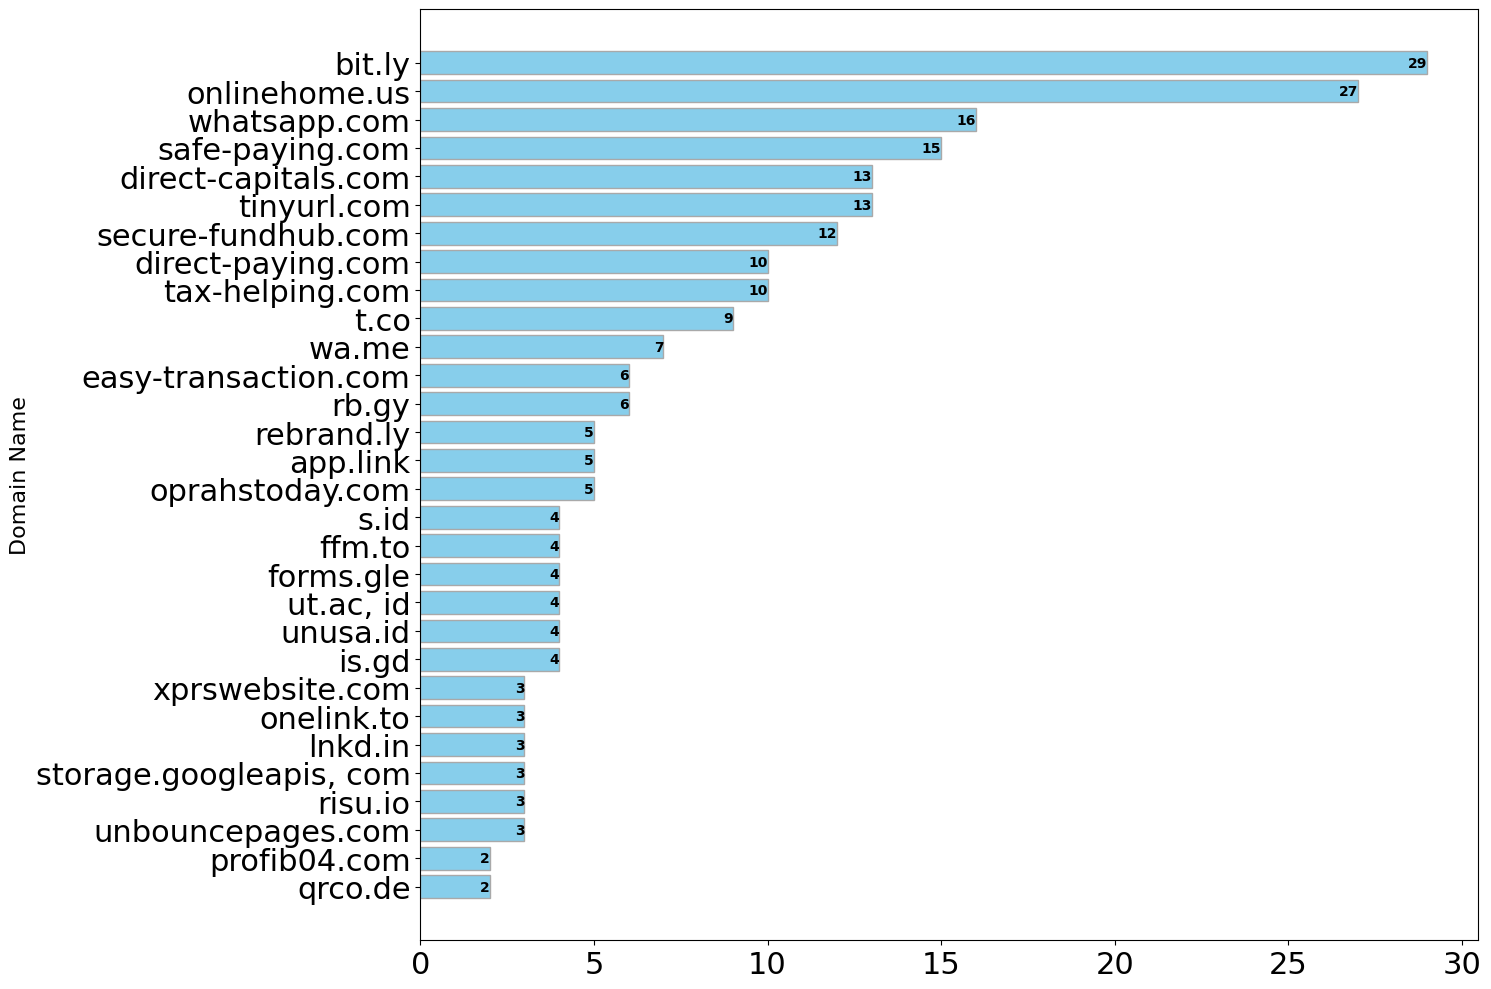

In [ ]:
data = df
# Count occurrences of each domain
domain_counts = data['Domain'].value_counts()

# Remove nan if present
domain_counts = domain_counts.drop('nan', errors='ignore')

# Select the top 30 most used domain names
top_domains = domain_counts.head(30)

# Create labels by combining Domain and TLD
labels = [f"{domain}.{data[data['Domain'] == domain]['TLD'].iloc[0]}" for domain in top_domains.index]

# Plot a horizontal bar chart with borders
plt.figure(figsize=(15, 10))
bars = plt.barh(labels, top_domains.values, color='skyblue', edgecolor='darkgrey')  # Add edgecolor for borders
plt.ylabel('Domain Name')
plt.title('Top 30 Most Used Domain Names')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent at the top

plt.xlabel('', fontsize=10)
plt.ylabel('Domain Name', fontsize=16)
plt.title('', fontsize=12)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# Add number labels to the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}',
             ha='right', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

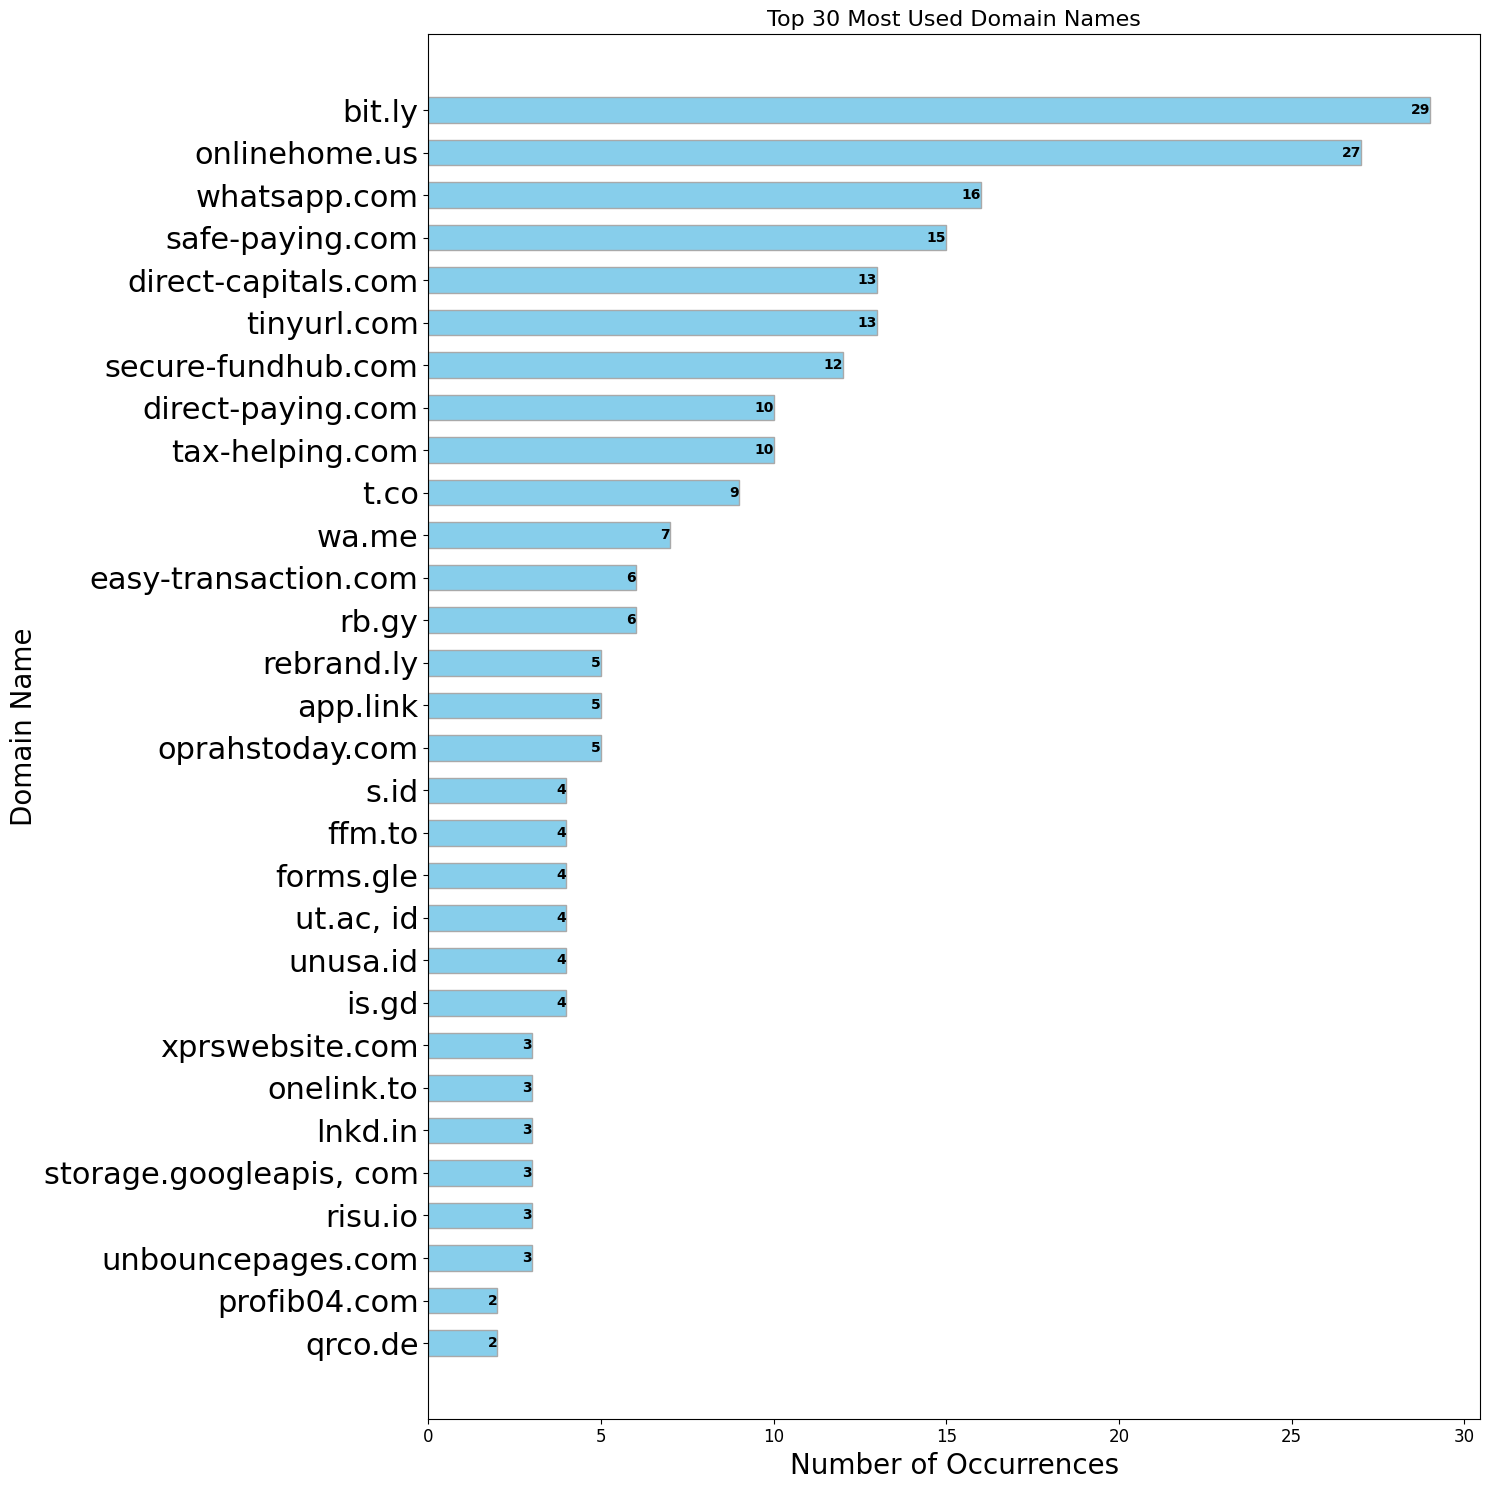

In [ ]:
import matplotlib.pyplot as plt

data = df

# Count occurrences of each domain
domain_counts = data['Domain'].value_counts()

# Remove nan if present
domain_counts = domain_counts.drop('nan', errors='ignore')

# Select the top 30 most used domain names
top_domains = domain_counts.head(30)

# Create labels by combining Domain and TLD
labels = [f"{domain}.{data[data['Domain'] == domain]['TLD'].iloc[0]}" for domain in top_domains.index]

# Adjust spacing between bars
bar_height = 0.6  # Reduce bar height for more spacing
y_positions = range(len(labels))  # Define positions for each bar

# Plot a horizontal bar chart with borders
plt.figure(figsize=(15, 15))  # Increase figure height to accommodate spacing
bars = plt.barh(y_positions, top_domains.values, height=bar_height, color='skyblue', edgecolor='darkgrey')

plt.yticks(y_positions, labels, fontsize=22)  # Set custom y-ticks with labels
plt.xticks(fontsize=12)
plt.xlabel('Number of Occurrences', fontsize=20)
plt.ylabel('Domain Name', fontsize=20)
plt.title('Top 30 Most Used Domain Names', fontsize=16)

plt.gca().invert_yaxis()  # Invert y-axis so the most frequent is at the top

# Add number labels to the end of each bar
for bar, value in zip(bars, top_domains.values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(value)}',
             ha='right', va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()
